In [2]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

waze_cleaned = pd.read_csv("../data/waze_cleaned.csv")

In [3]:
waze_cleaned.head()

label  sessions  drives  total_sessions  n_days_after_onboarding  \
0  retained       283     226      296.748273                     2276   
1  retained       133     107      326.896596                     1225   
2  retained       114      95      135.522926                     2651   
3  retained        49      40       67.589221                       15   
4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  
0              1985.775061             28            19  Android  
1              3160.472914             13            11   iPhone  
2              1610.735904             14             8  Android  
3               587.196542              7             3   iPhone  
4              1219.555924             27            18  Android

**Univariate analysis**

In [4]:
waze_cleaned.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14299.000000  14299.000000    14299.000000             14299.000000   
mean      80.623820     67.255822      189.547409              1751.822505   
std       80.736502     65.947295      136.189764              1008.663834   
min        0.000000      0.000000        0.220211                 4.000000   
25%       23.000000     20.000000       90.457733               878.500000   
50%       56.000000     48.000000      158.718571              1749.000000   
75%      111.000000     93.000000      253.540450              2627.500000   
max      743.000000    596.000000     1216.154633              3500.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14299.000000            14299.000000      14299.000000   
mean               121.747395               29.638296       4044.401535   
std                147.713428               45.350890       2504.977970   
min                  0.000000                0.000000         60.441250   
25%                 10.000000                0.000000       2217.319909   
50%                 71.000000                9.000000       3496.545617   
75%                178.000000               43.000000       5299.972162   
max               1236.000000              415.000000      21183.401890   

       duration_minutes_drives  activity_days  driving_days  
count             14299.000000   14299.000000  14299.000000  
mean               1864.199794      15.544653     12.182530  
std                1448.005047       9.016088      7.833835  
min                  18.282082       0.000000      0.000000  
25%                 840.181344       8.000000      5.000000  
50%                1479.394387      16.000000     12.000000  
75%                2466.928876      23.000000     19.000000  
max               15851.727160      31.000000     30.000000

Should I consider renaming the "label" column to "churn" or something similar? Should I convert to boolean?


In [5]:
#convert label column datatype to boolean

#df_indexed_bool = df_indexed['label'].apply(lambda x: True if x == 'churned' else False)
#Ended up not using this, could convert if necessary. 

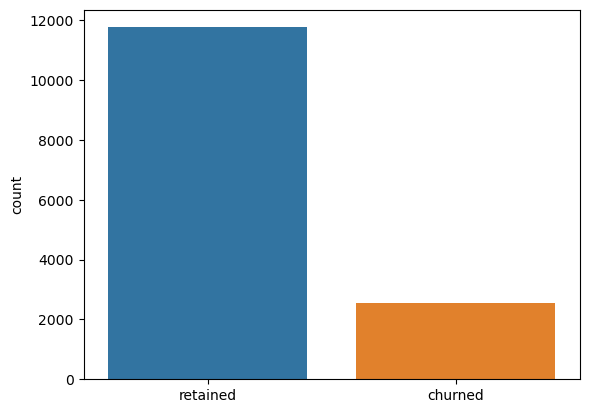

In [6]:
sns.countplot(x = waze_cleaned["label"])
plt.xlabel("");

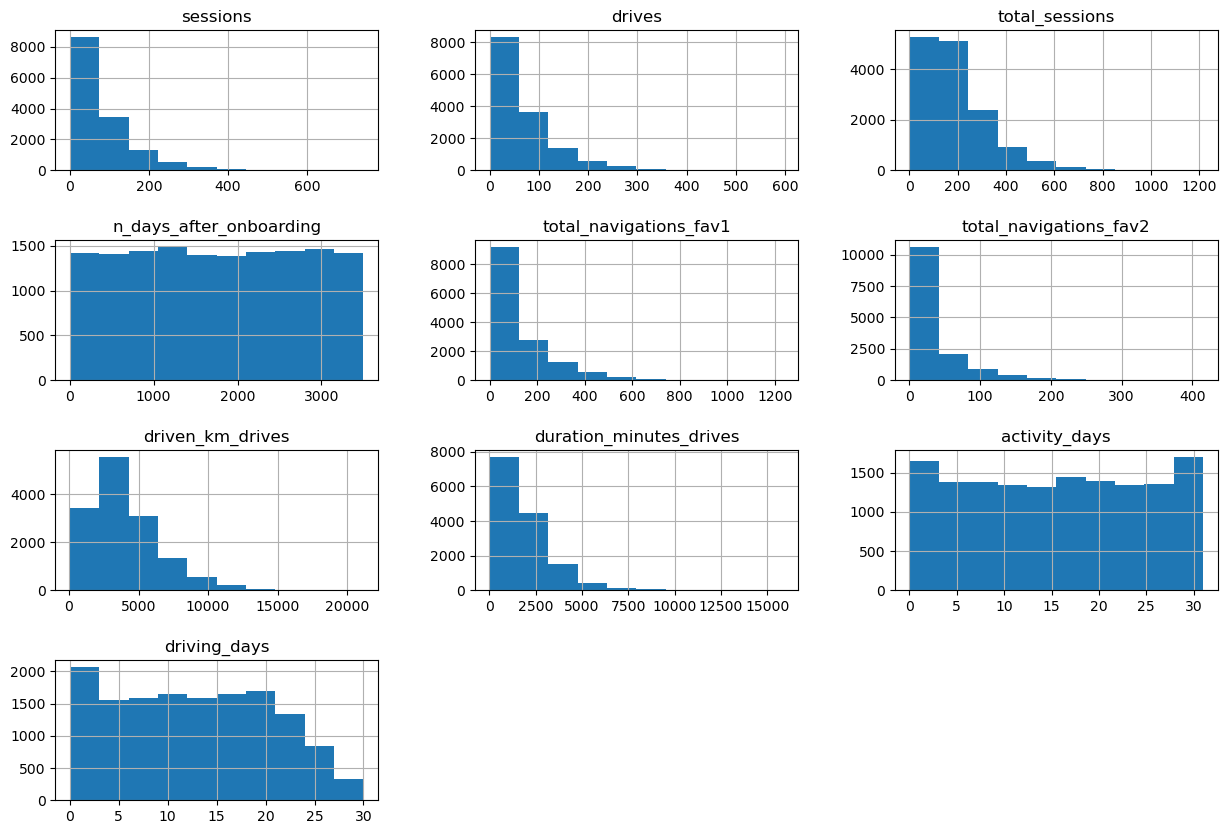

In [7]:
waze_cleaned.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

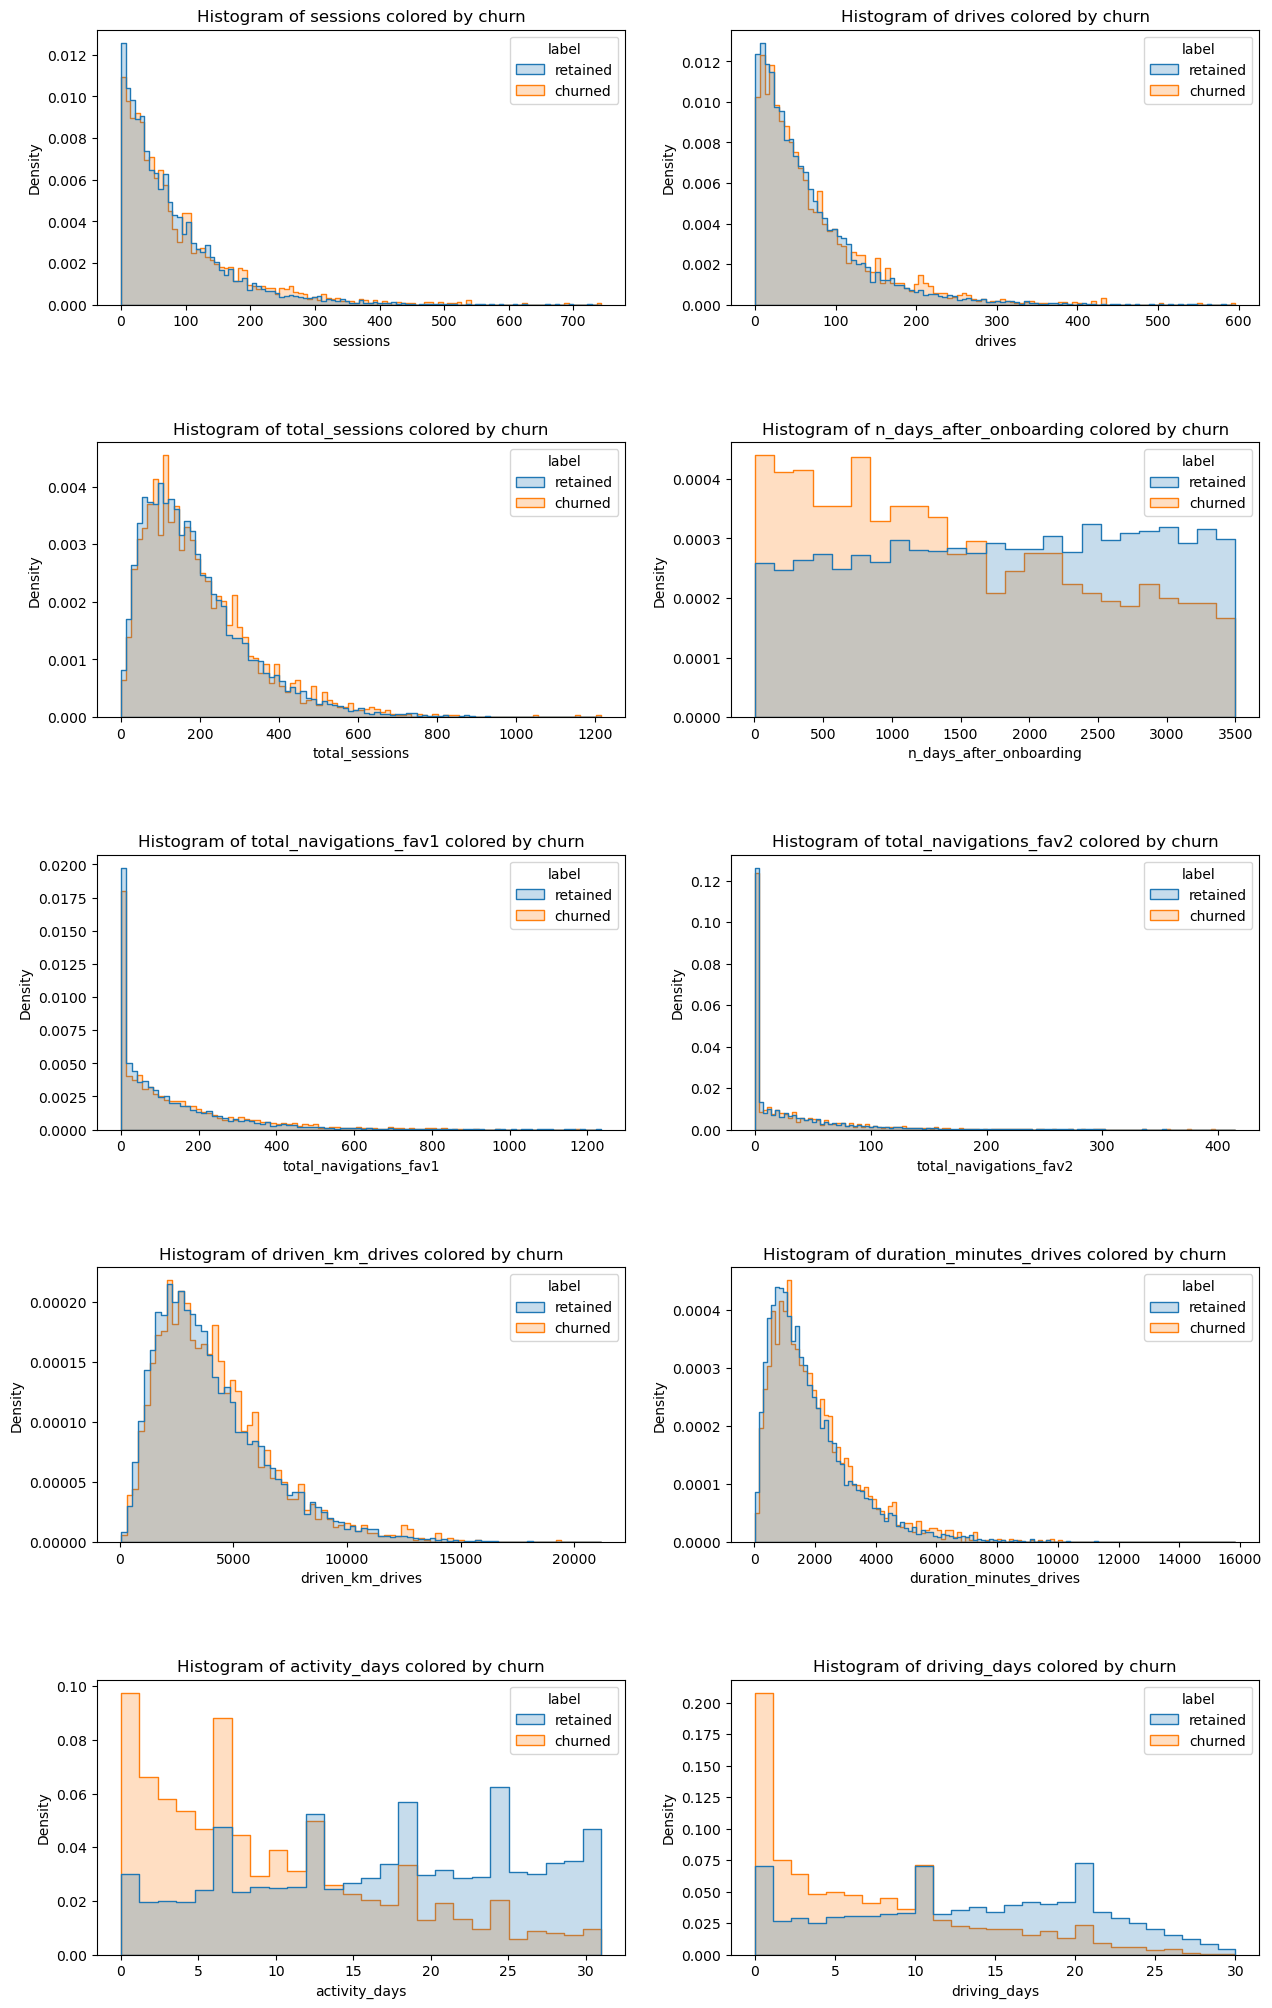

In [15]:
# Filter to only numeric columns
numeric_cols = waze_cleaned.select_dtypes(include=[np.number]).columns

# Set up the figure size
num_plots = len(numeric_cols)
n_cols = 2  # Number of columns in subplot

# Make sure n_rows is calculated as an integer
n_rows = (num_plots + n_cols - 1) // n_cols  # Ensures we have enough rows for all plots

plt.figure(figsize=(15, 5 * n_rows))

# Create a subplot for each numeric feature
for i, col in enumerate(numeric_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)  # Make sure subplot indices are integers
    sns.histplot(data=waze_cleaned, x=col, hue="label", element="step", stat="density", common_norm=False, ax=ax)
    plt.title(f'Histogram of {col} colored by churn')

plt.subplots_adjust(hspace=0.5)  # Adjust the spacing as needed
plt.show()


In [12]:
# Select only the numerical columns for the scatterplots (excluding 'total_sessions' for the x-axis)
numeric_cols = waze_cleaned.select_dtypes(include=[np.number]).columns.drop('total_sessions')

# Define the number of columns for your grid
num_columns = 3  # This will make the grid have 3 columns

# Create a FacetGrid, using 'total_sessions' as the x-axis for all plots
g = sns.FacetGrid(waze_cleaned, col_wrap=num_columns, col=numeric_cols.size)
g = (g.map_dataframe(sns.scatterplot, 'total_sessions', 'value')
      .set_axis_labels("Total Sessions", "Value")
      .set_titles("{col_name}"))

# Iterate over each axis to set the column data for the y-axis
for ax, col in zip(g.axes, numeric_cols):
    ax.scatter(waze_cleaned['total_sessions'], waze_cleaned[col])

plt.tight_layout()
plt.show()

KeyError: 9

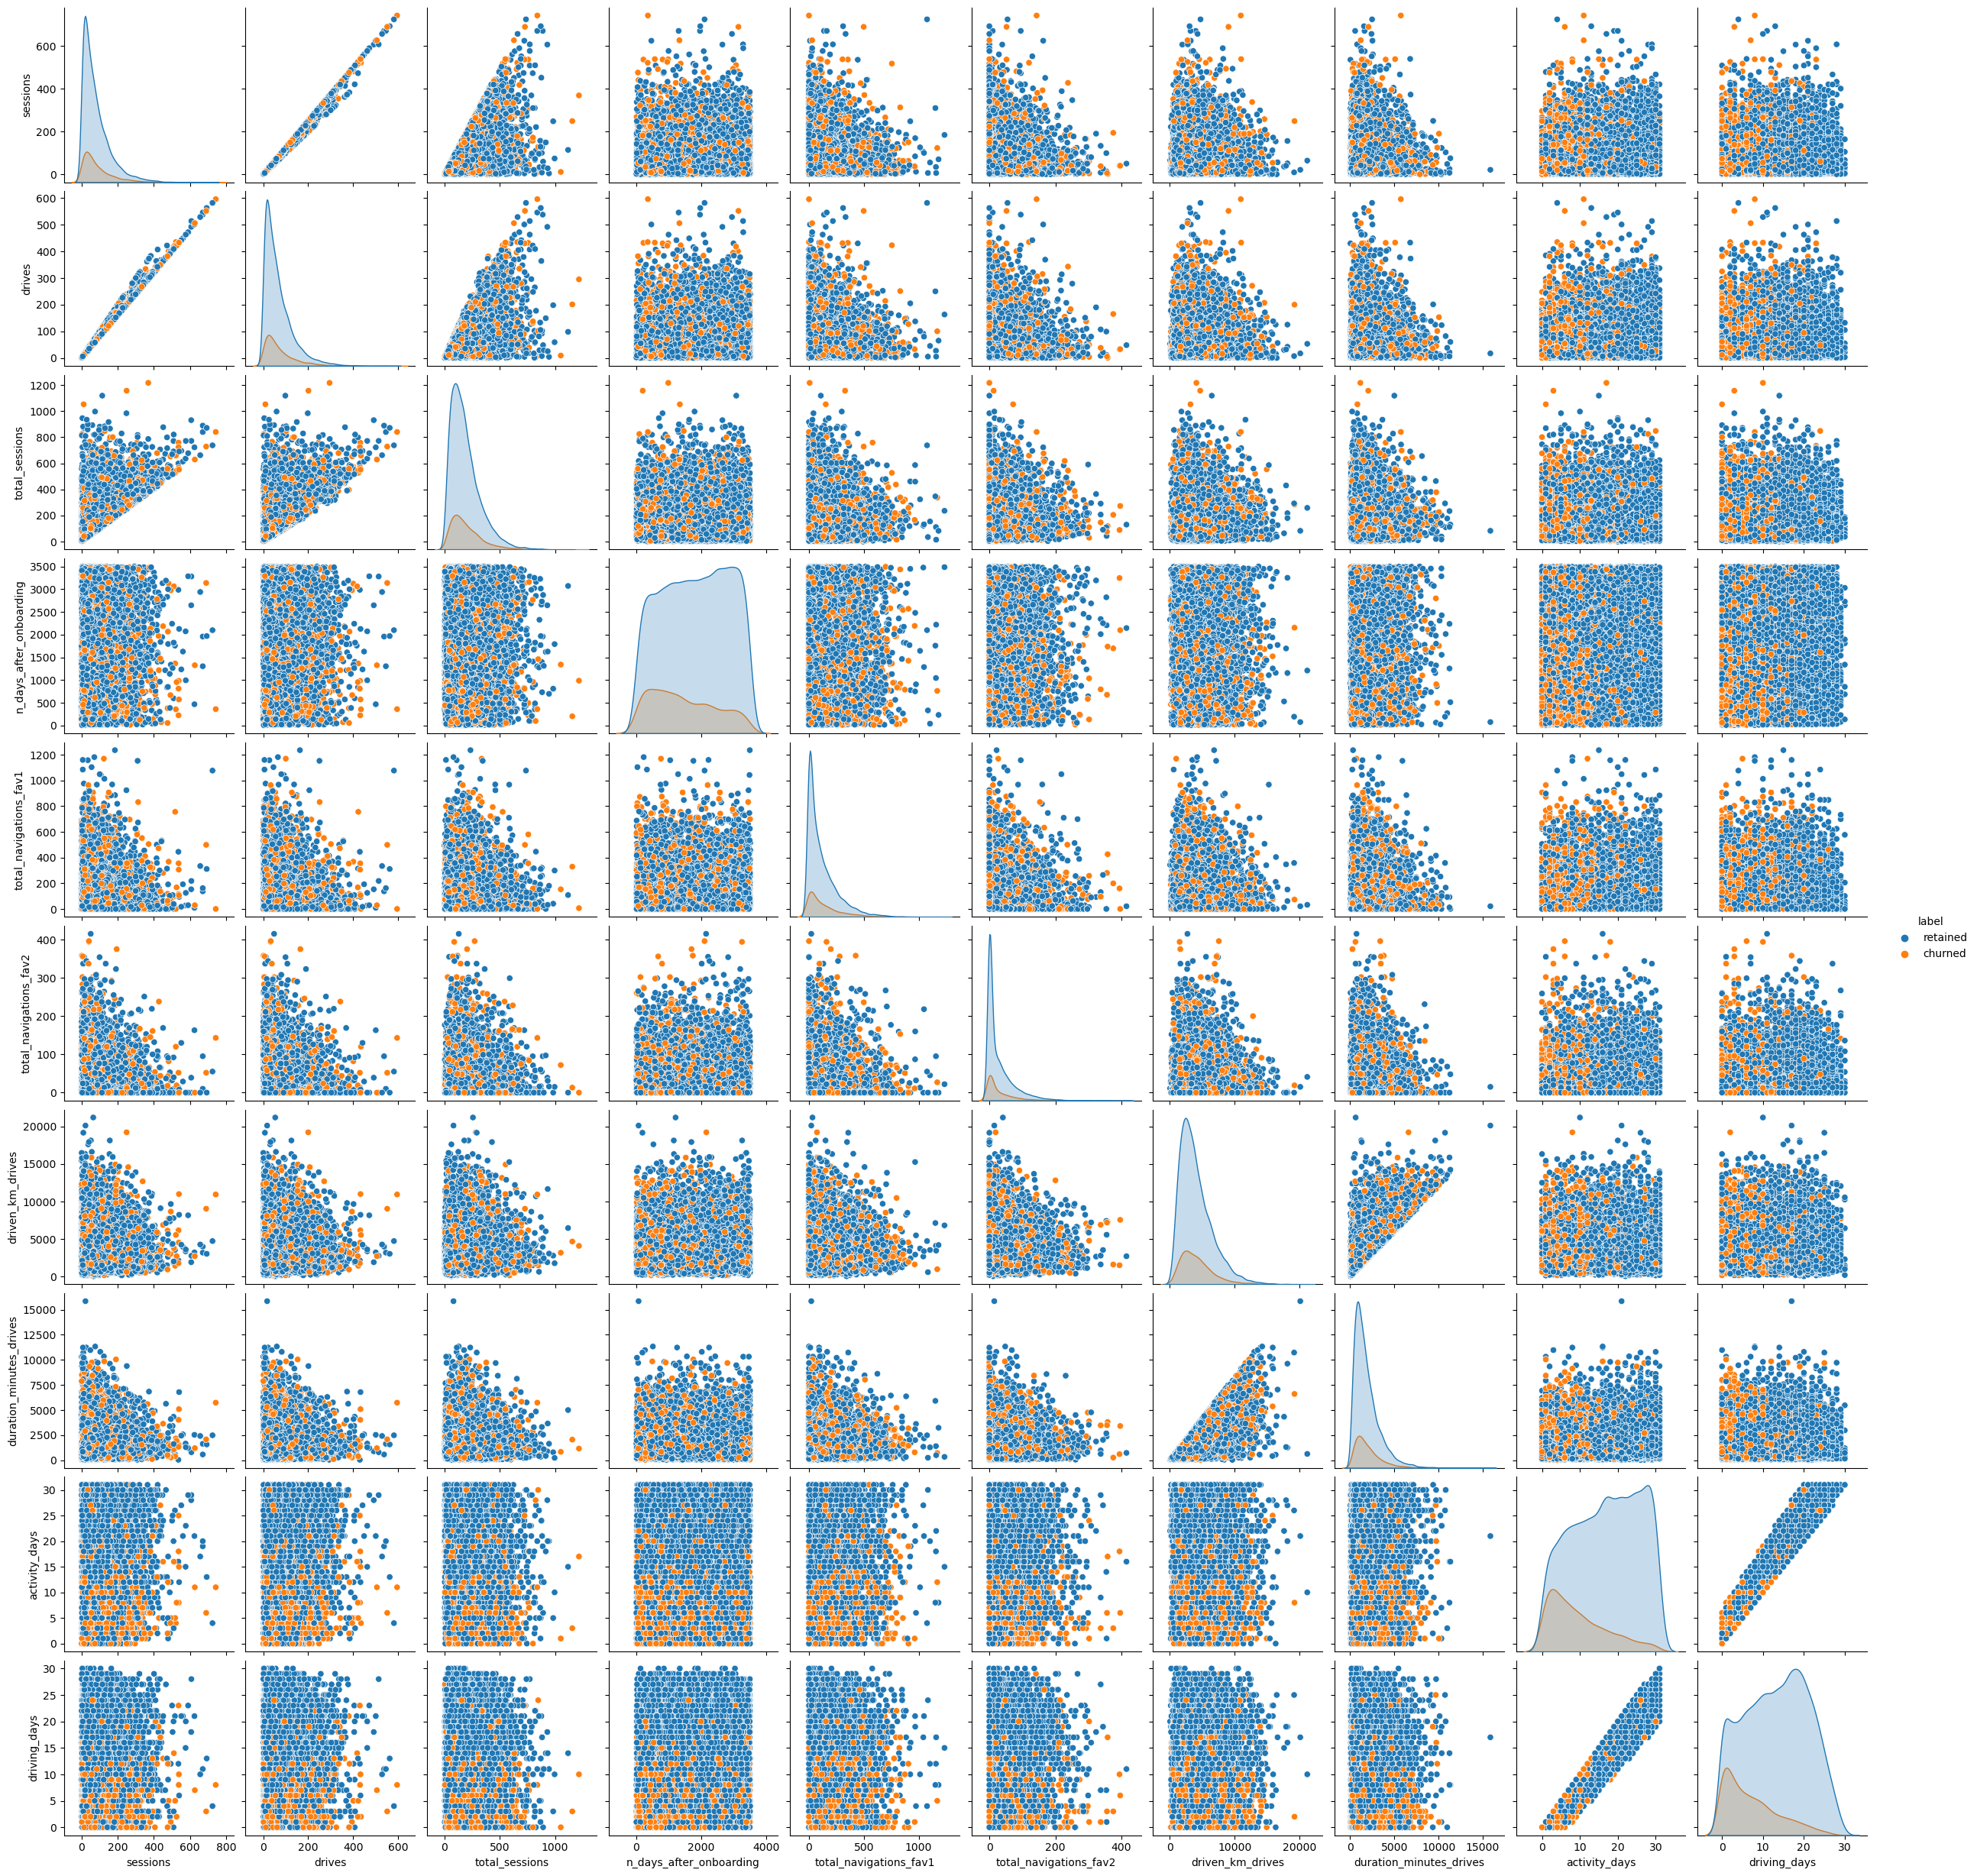

In [13]:
sns.pairplot(waze_cleaned, hue='label')

I know this boxplot with a shared y axis doesn't work because of relatively extreme value ranges in a couple feautures. Is it reasonable to examine boxplots of all columns to check for outliers? If so, how should I approach the plots?

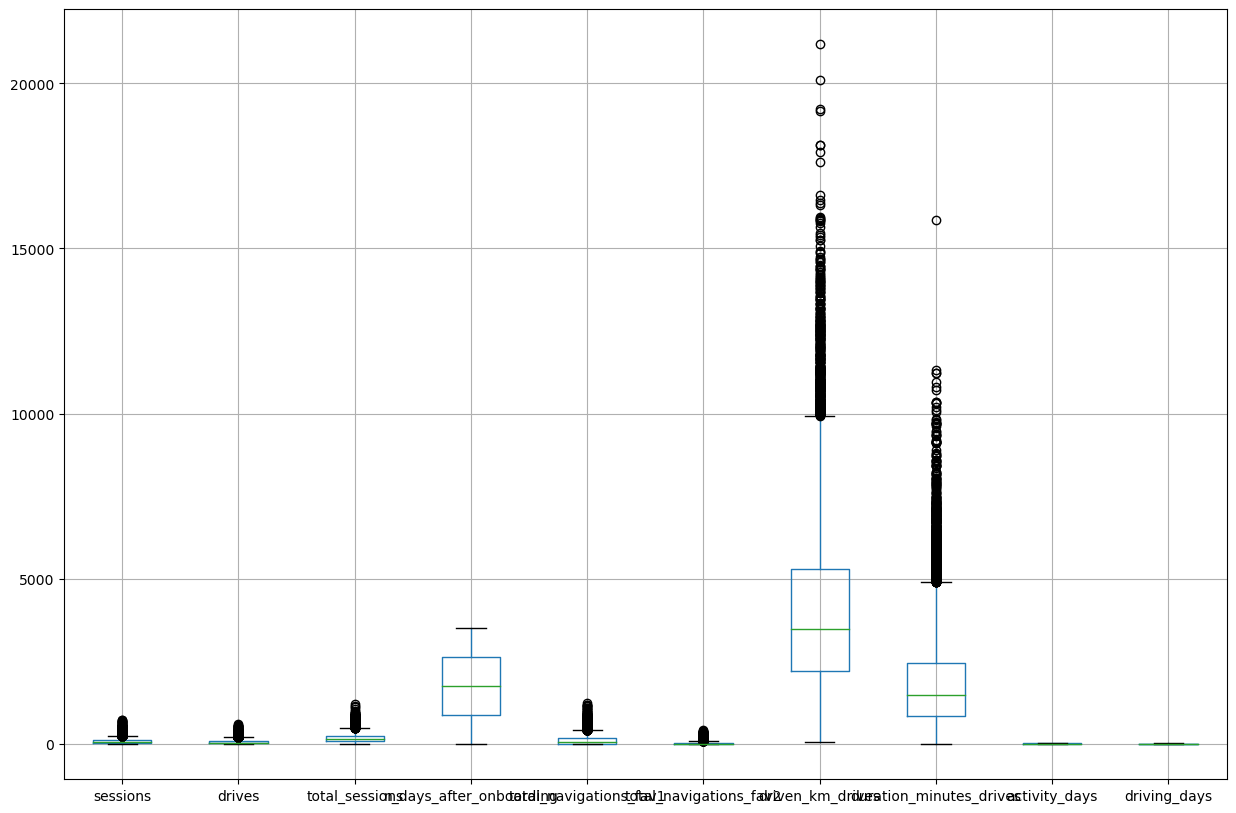

In [8]:
waze_cleaned.boxplot(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

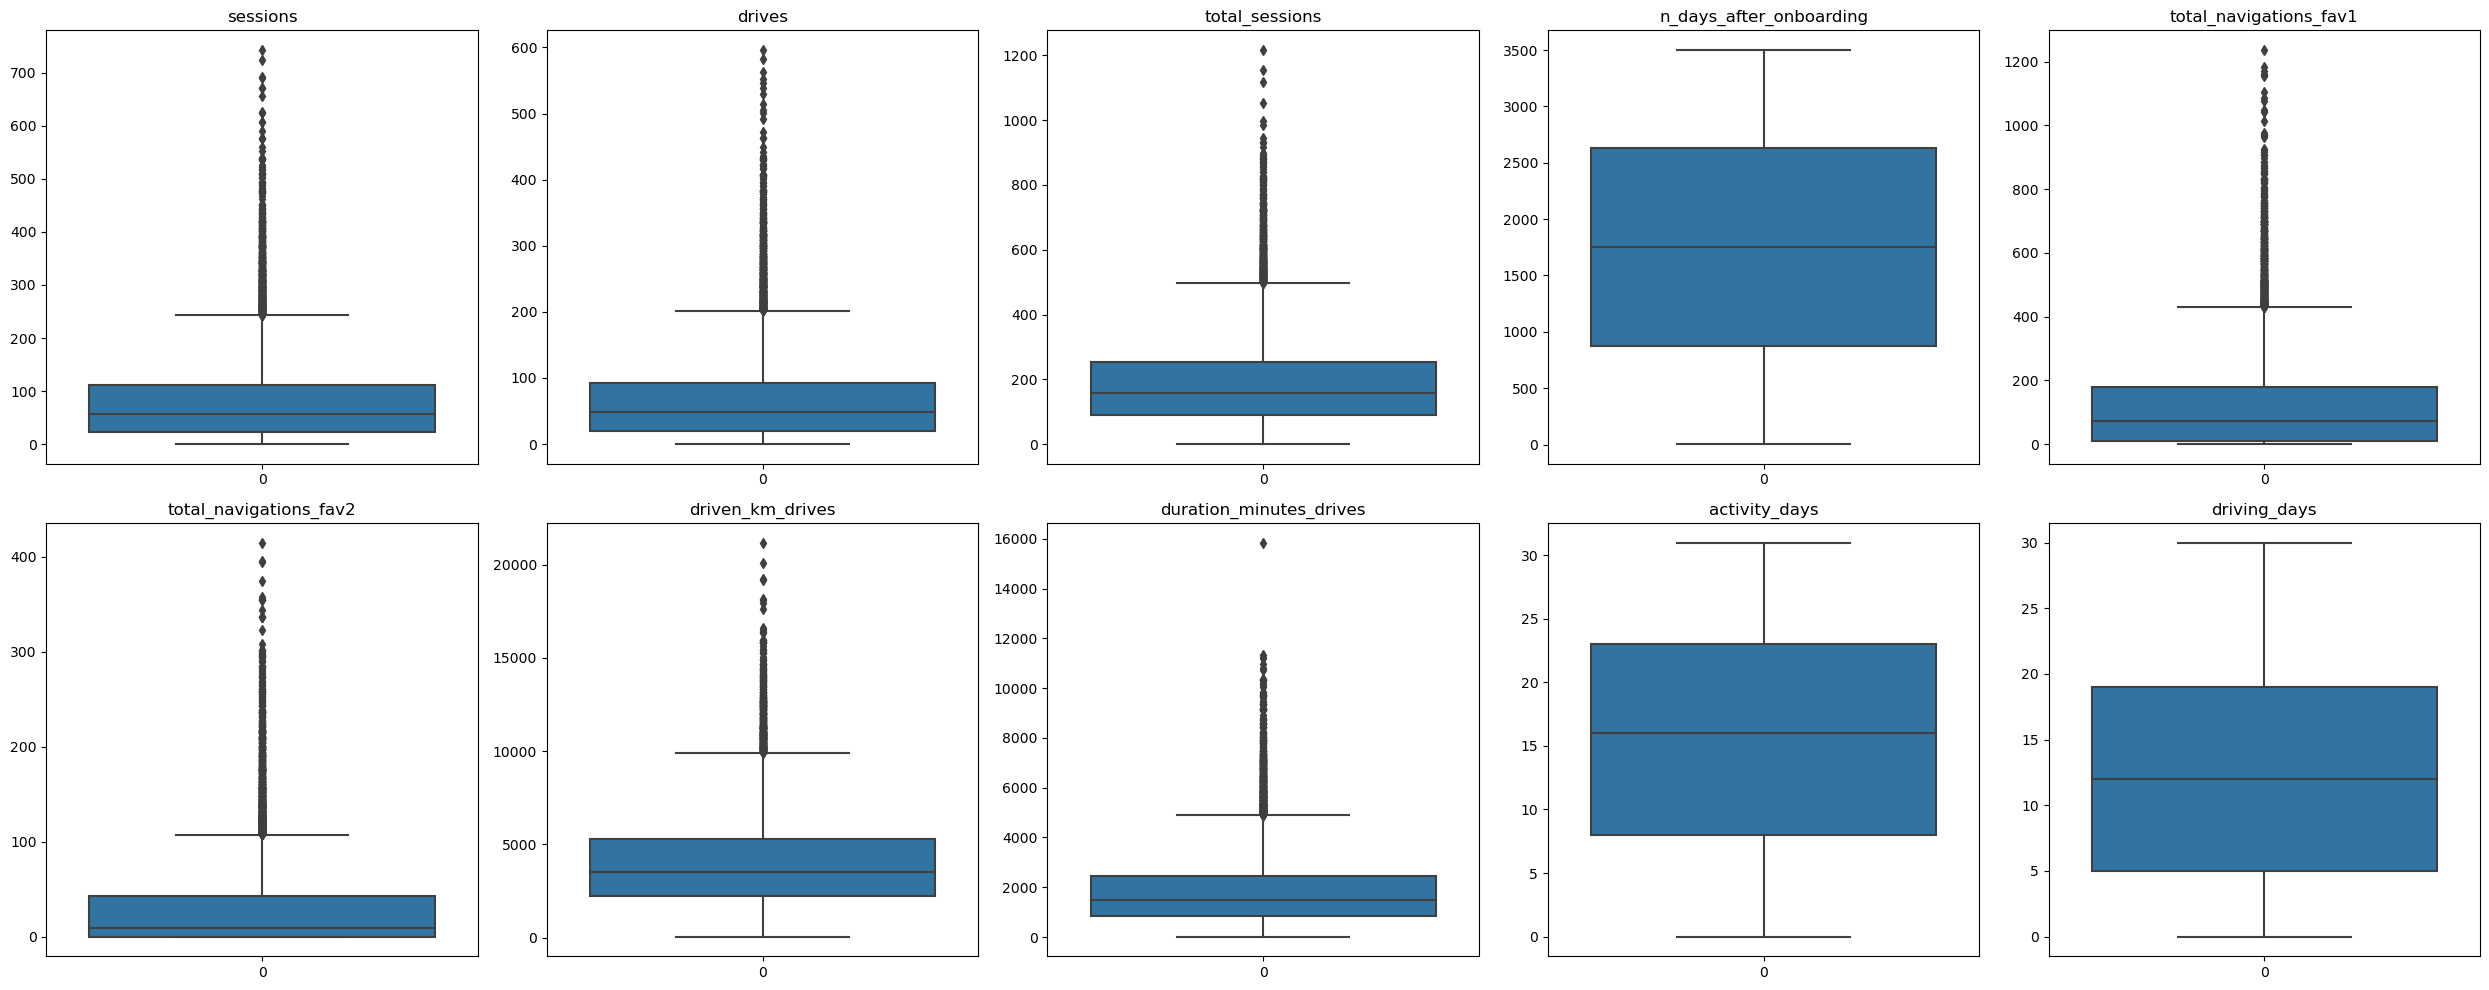

In [11]:
# Assuming 'waze_cleaned' is your DataFrame and it's already been loaded and cleaned
# Filter out non-numeric columns for the boxplots
numeric_cols = waze_cleaned.select_dtypes(include=[np.number]).columns
num_features = len(numeric_cols)

# Set up the number of rows and columns for the subplot array
nrows = 2  # Number of rows
ncols = int(np.ceil(num_features / nrows))  # Number of columns calculated based on the number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))  # Adjust the figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numeric features and create boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=waze_cleaned[col], ax=axes[i])
    axes[i].set_title(col)

# If the number of numeric features is not a multiple of the subplot grid we need to remove the empty subplots
for i in range(num_features, nrows * ncols):
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust the spacing as needed
plt.tight_layout()
plt.show()


They look bizarre, but they have to be separate because of disparate ranges. Should I normalize them in some way?

**Bivariate analysis** seaborn facetgrid of scatterplots to compare features. And heatmap. And look at Pearson's r values? https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/quantitative-exploratory-data-analysis?ex=15 for help with pearson's r

In [ ]:
waze_cleaned.corr()

In [ ]:
# Make a heatmap of the data 
plt.figure(figsize= (10, 6))
sns.heatmap(waze_cleaned.corr(), annot = True, cmap='coolwarm')
plt.show()